In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_colwidth',None)

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import warnings
warnings.filterwarnings(action='ignore')

In [49]:
data = pd.read_csv('fetal_health.csv')
data.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   baseline value                                          2126 non-null   float64
 1   accelerations                                           2126 non-null   float64
 2   fetal_movement                                          2126 non-null   float64
 3   uterine_contractions                                    2126 non-null   float64
 4   light_decelerations                                     2126 non-null   float64
 5   severe_decelerations                                    2126 non-null   float64
 6   prolongued_decelerations                                2126 non-null   float64
 7   abnormal_short_term_variability                         2126 non-null   float64
 8   mean_value_of_short_term_variability  

In [51]:
data.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


In [52]:
print(data.columns)

Index(['baseline value', 'accelerations', 'fetal_movement',
       'uterine_contractions', 'light_decelerations', 'severe_decelerations',
       'prolongued_decelerations', 'abnormal_short_term_variability',
       'mean_value_of_short_term_variability',
       'percentage_of_time_with_abnormal_long_term_variability',
       'mean_value_of_long_term_variability', 'histogram_width',
       'histogram_min', 'histogram_max', 'histogram_number_of_peaks',
       'histogram_number_of_zeroes', 'histogram_mode', 'histogram_mean',
       'histogram_median', 'histogram_variance', 'histogram_tendency',
       'fetal_health'],
      dtype='object')


In [53]:
data.isnull().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

In [54]:
data['fetal_health'].value_counts()

fetal_health
1.0    1655
2.0     295
3.0     176
Name: count, dtype: int64

<Axes: xlabel='fetal_health', ylabel='count'>

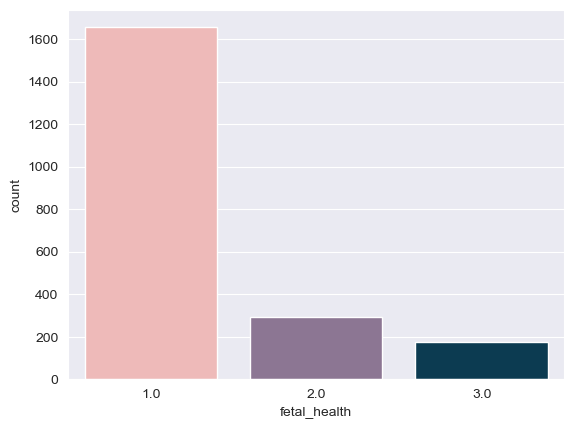

In [55]:
colours=["#f7b2b0","#8f7198","#003f5c"]
sns.countplot(data= data , x="fetal_health",palette=colours)


In [56]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
baseline value,2126.0,133.303857,9.840844,106.0,126.000,133.000,140.000,160.000
accelerations,2126.0,0.003178,0.003866,0.0,0.000,0.002,0.006,0.019
fetal_movement,2126.0,0.009481,0.046666,0.0,0.000,0.000,0.003,0.481
uterine_contractions,2126.0,0.004366,0.002946,0.0,0.002,0.004,0.007,0.015
light_decelerations,2126.0,0.001889,0.002960,0.0,0.000,0.000,0.003,0.015
severe_decelerations,2126.0,0.000003,0.000057,0.0,0.000,0.000,0.000,0.001
prolongued_decelerations,2126.0,0.000159,0.000590,0.0,0.000,0.000,0.000,0.005
abnormal_short_term_variability,2126.0,46.990122,17.192814,12.0,32.000,49.000,61.000,87.000
mean_value_of_short_term_variability,2126.0,1.332785,0.883241,0.2,0.700,1.200,1.700,7.000
percentage_of_time_with_abnormal_long_term_variability,2126.0,9.846660,18.396880,0.0,0.000,0.000,11.000,91.000


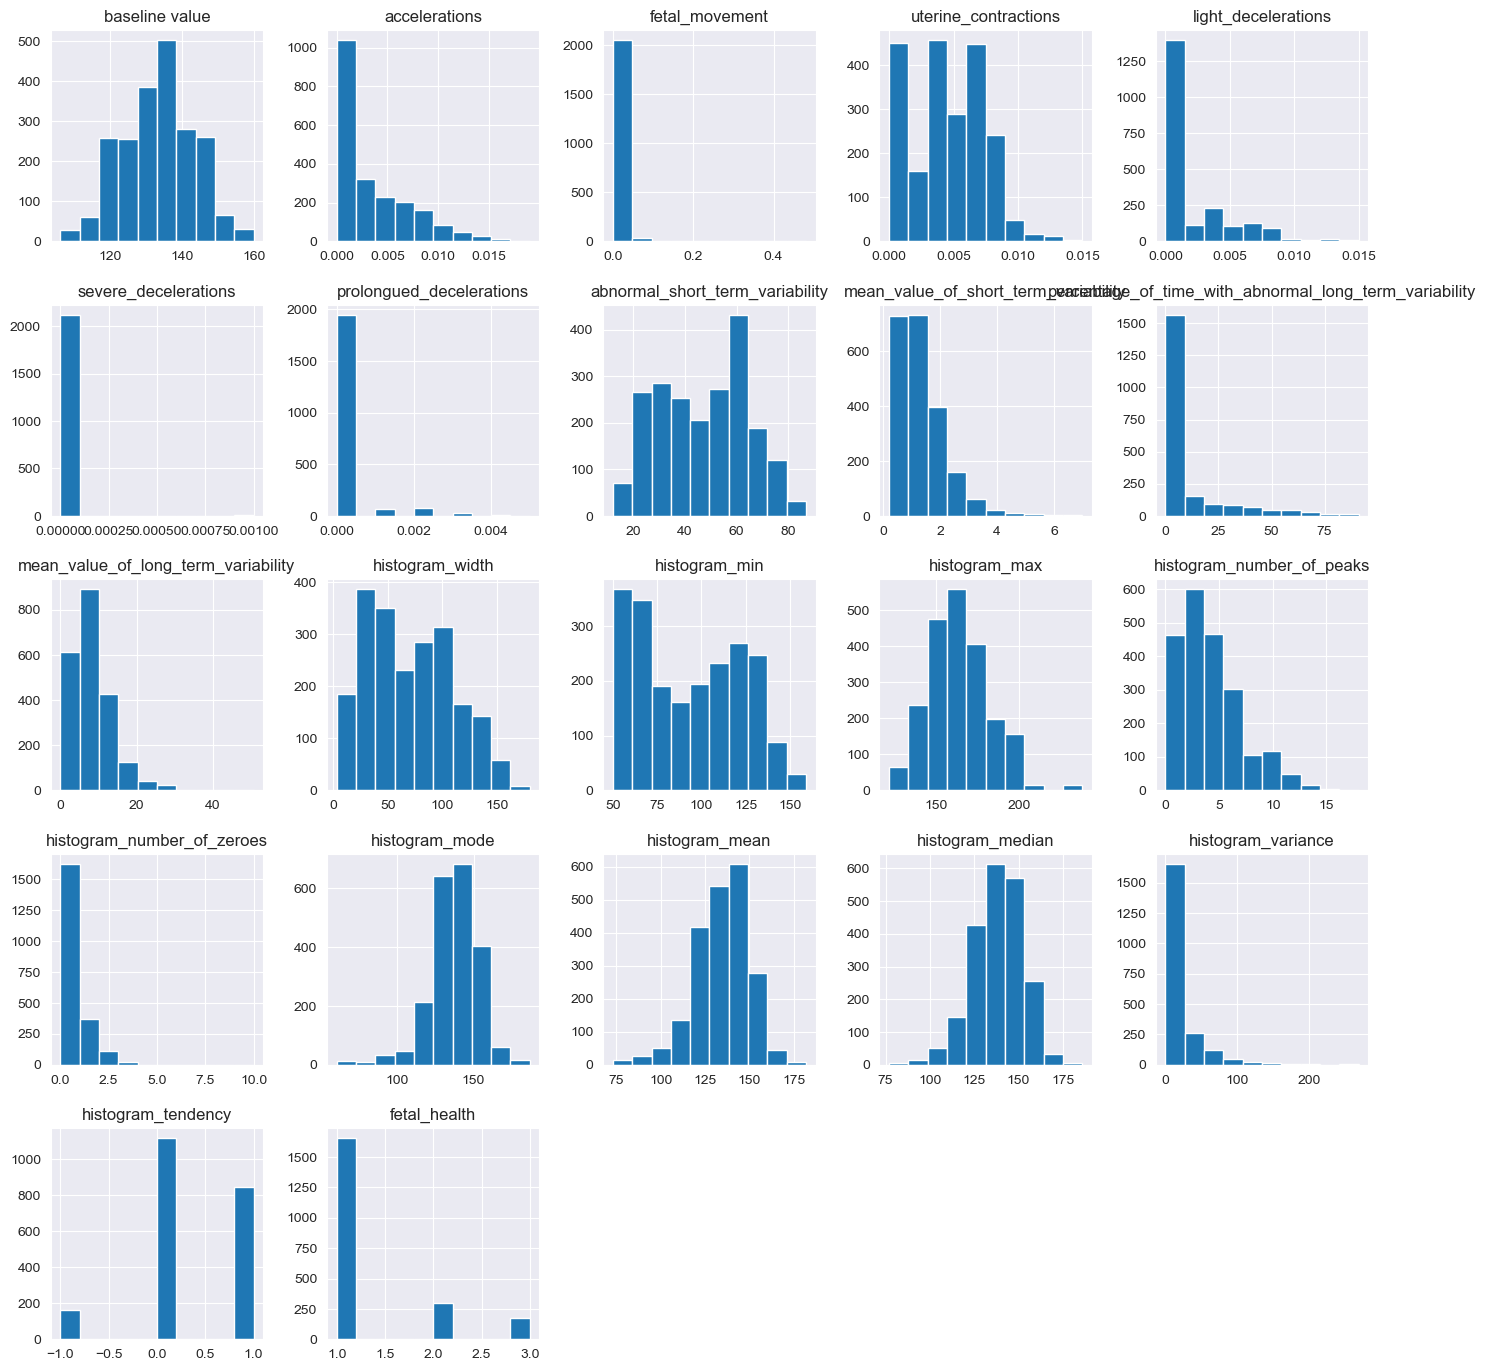

In [57]:
data.hist(figsize=(17,17), layout=(5,5), sharex=False);

<Axes: xlabel='fetal_movement', ylabel='fetal_health'>

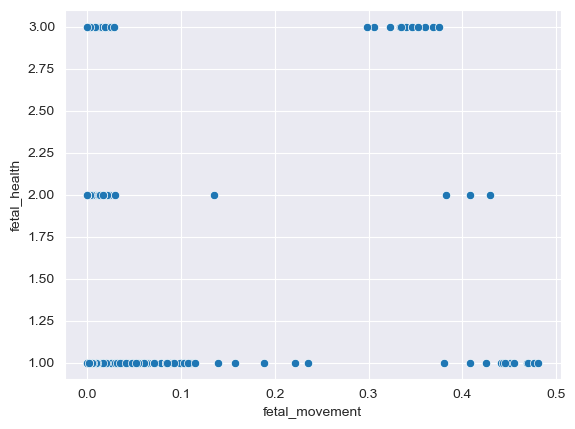

In [58]:
import seaborn as sns 

sns.scatterplot(data=data, x='fetal_movement', y='fetal_health')

<Axes: >

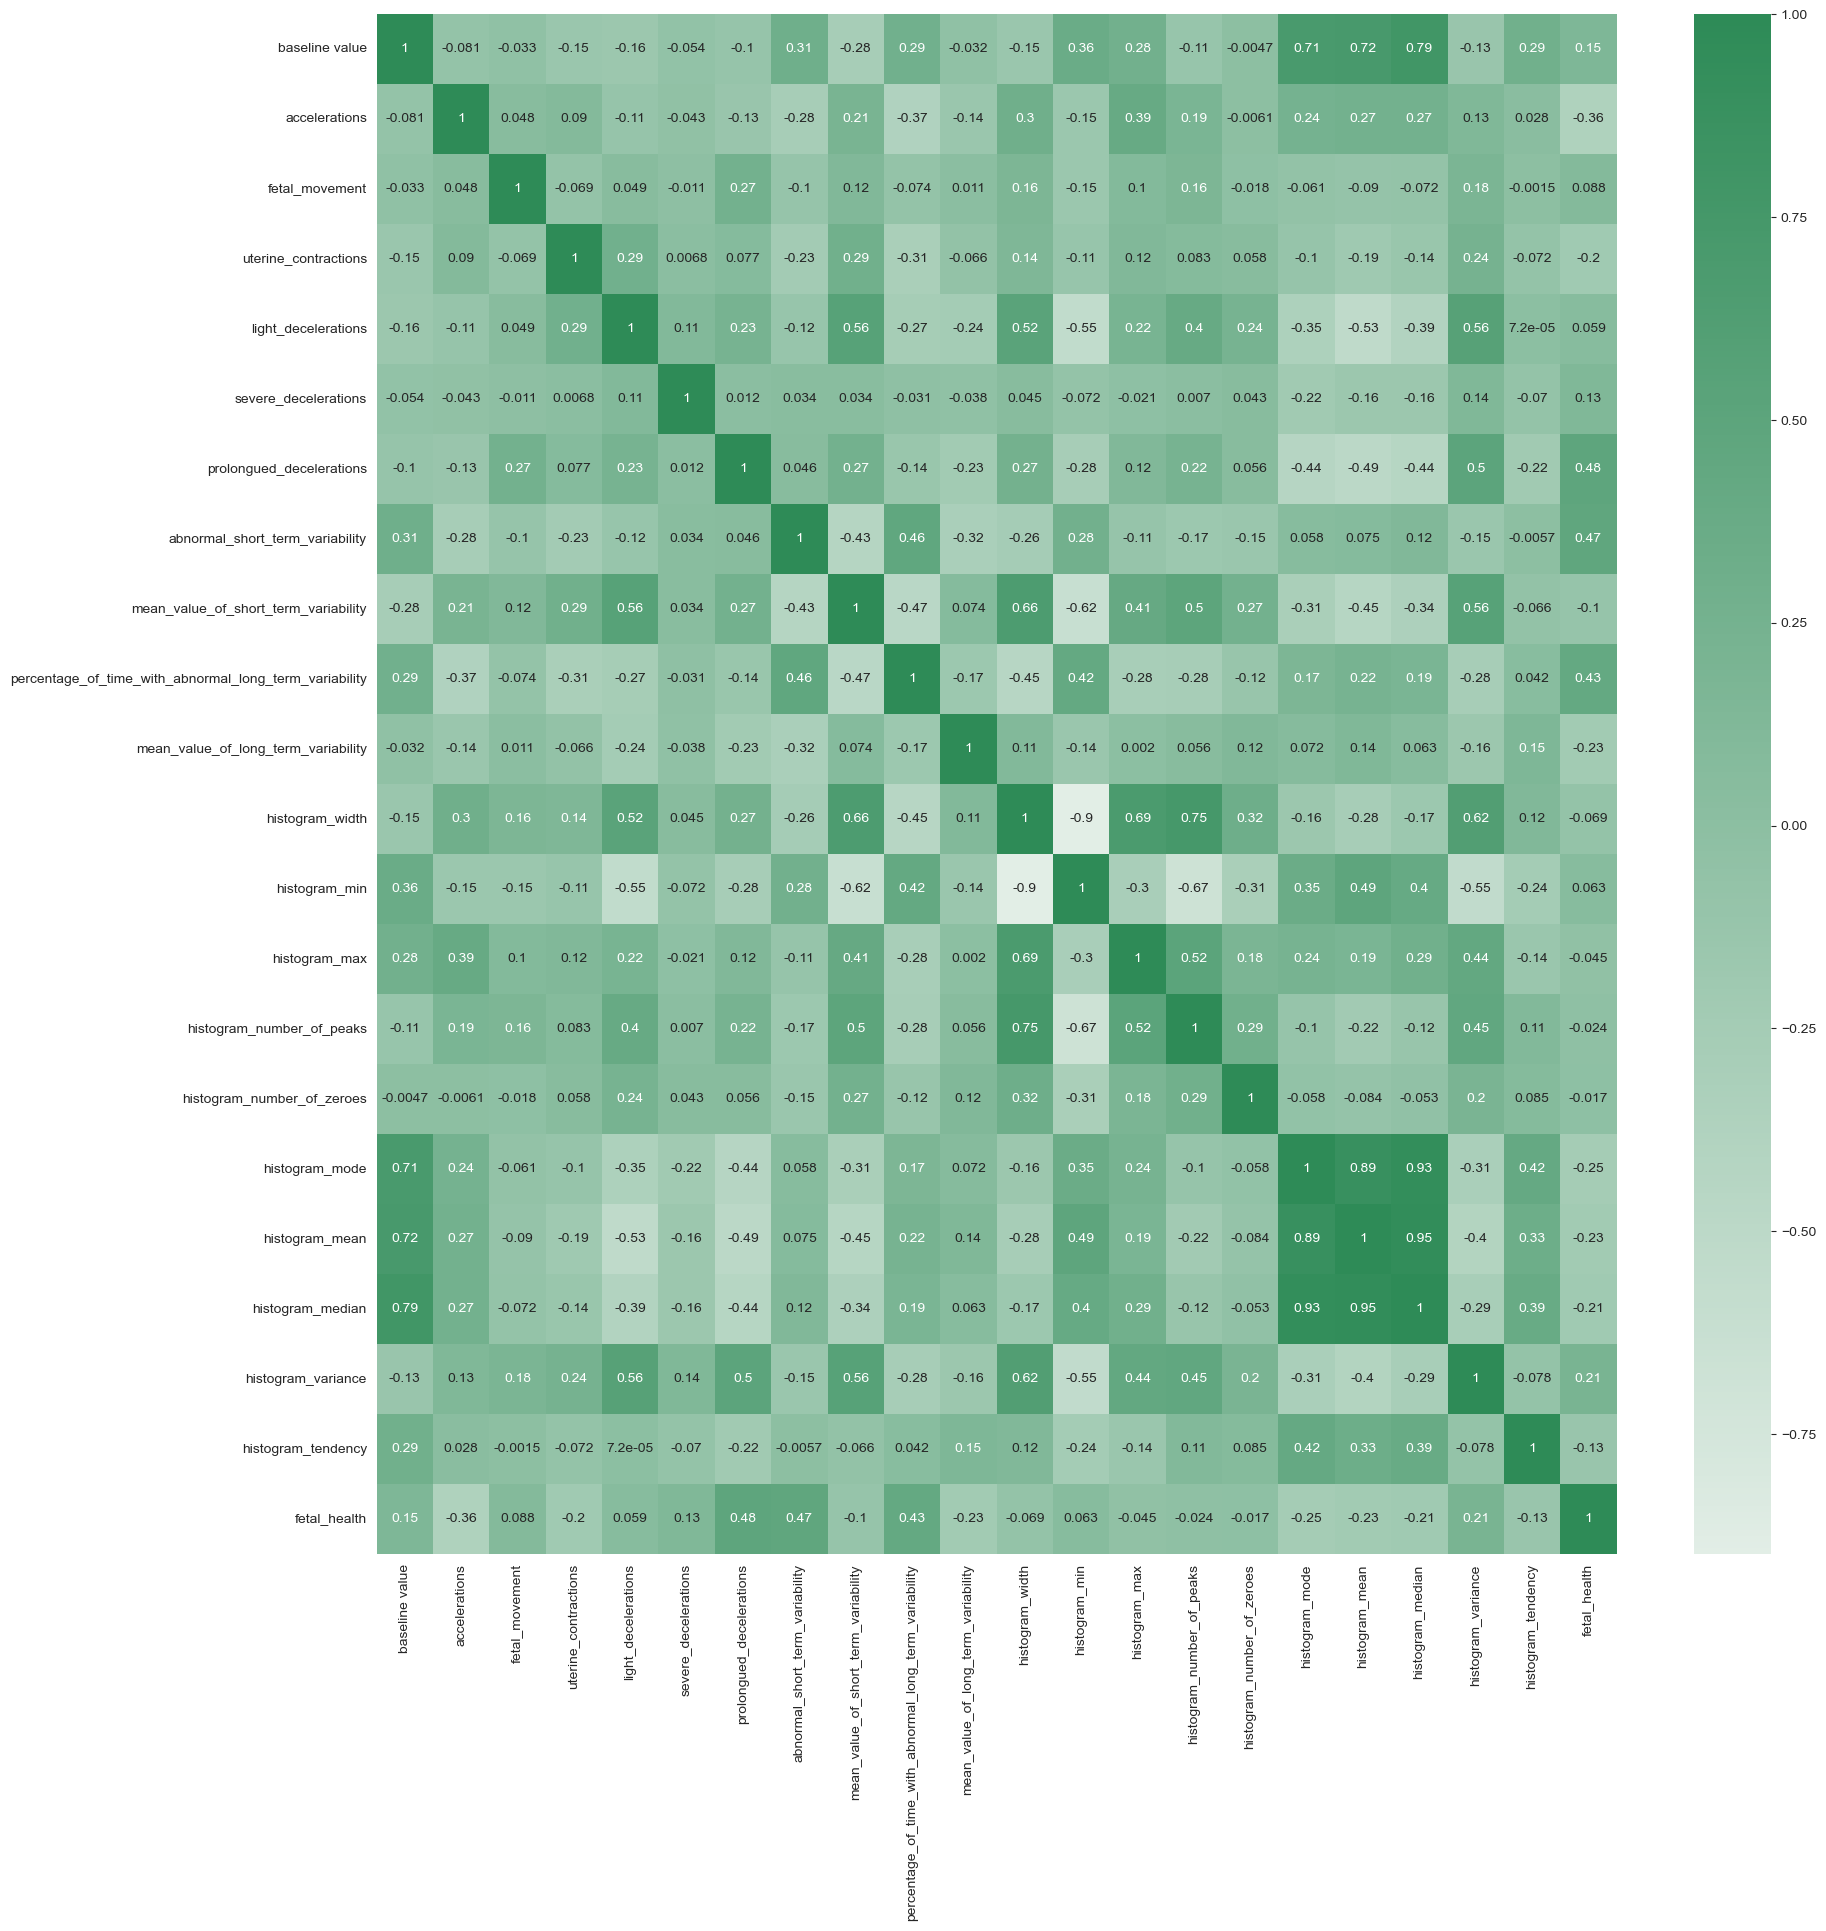

In [59]:
#correlation matrix
corrmat= data.corr()
plt.figure(figsize=(20,20))

cmap= sns.light_palette("seagreen", as_cmap=True)

sns.heatmap(corrmat,annot=True, cmap=cmap, center=0)

In [22]:
data.corr(method="pearson")["fetal_health"].sort_values(ascending=False)


fetal_health                                              1.000000
prolongued_decelerations                                  0.484859
abnormal_short_term_variability                           0.471191
percentage_of_time_with_abnormal_long_term_variability    0.426146
histogram_variance                                        0.206630
baseline value                                            0.148151
severe_decelerations                                      0.131934
fetal_movement                                            0.088010
histogram_min                                             0.063175
light_decelerations                                       0.058870
histogram_number_of_zeroes                               -0.016682
histogram_number_of_peaks                                -0.023666
histogram_max                                            -0.045265
histogram_width                                          -0.068789
mean_value_of_short_term_variability                     -0.10

In [60]:
new_data=data.loc[:,["prolongued_decelerations","abnormal_short_term_variability","percentage_of_time_with_abnormal_long_term_variability","mean_value_of_short_term_variability","histogram_tendency","uterine_contractions","mean_value_of_long_term_variability","histogram_mean","accelerations"
]]

In [61]:
new_data.head()

,prolongued_decelerations,abnormal_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,mean_value_of_short_term_variability,histogram_tendency,uterine_contractions,mean_value_of_long_term_variability,histogram_mean,accelerations
0,0.0,73.0,43.0,0.5,1.0,0.000,2.4,137.0,0.000
1,0.0,17.0,0.0,2.1,0.0,0.006,10.4,136.0,0.006
2,0.0,16.0,0.0,2.1,0.0,0.008,13.4,135.0,0.003
3,0.0,16.0,0.0,2.4,1.0,0.008,23.0,134.0,0.003
4,0.0,16.0,0.0,2.4,1.0,0.008,19.9,136.0,0.007


In [62]:
X= data.drop(columns=['fetal_health'])
y = data["fetal_health"]
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
X_scaled = pd.DataFrame(scale.fit_transform(X), columns=X.columns)
X_scaled.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_width,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency
0,0.259259,0.000000,0.0,0.000000,0.0,0.0,0.0,0.813333,0.044118,0.472527,...,0.344633,0.110092,0.034483,0.111111,0.0,0.472441,0.587156,0.403670,0.271375,1.0
1,0.481481,0.315789,0.0,0.400000,0.2,0.0,0.0,0.066667,0.279412,0.000000,...,0.717514,0.165138,0.655172,0.333333,0.1,0.637795,0.577982,0.577982,0.044610,0.5
2,0.500000,0.157895,0.0,0.533333,0.2,0.0,0.0,0.053333,0.279412,0.000000,...,0.717514,0.165138,0.655172,0.277778,0.1,0.637795,0.568807,0.559633,0.048327,0.5
3,0.518519,0.157895,0.0,0.533333,0.2,0.0,0.0,0.053333,0.323529,0.000000,...,0.644068,0.027523,0.413793,0.611111,0.0,0.606299,0.559633,0.550459,0.048327,1.0
4,0.481481,0.368421,0.0,0.533333,0.0,0.0,0.0,0.053333,0.323529,0.000000,...,0.644068,0.027523,0.413793,0.500000,0.0,0.606299,0.577982,0.559633,0.040892,1.0


In [63]:
from sklearn.metrics import accuracy_score, confusion_matrix


In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, = train_test_split(X, y, test_size = 0.3, random_state = 10)
X_train.shape, X_test.shape

((1488, 21), (638, 21))

In [65]:
pip install imblearn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [66]:
pip install -U scikit-learn imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [67]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [68]:
X_train_smote, y_train_smote = smote.fit_resample(X_train.astype('float'),y_train)

In [69]:
from collections import Counter
print ("Before SMOTE:",Counter(y_train))
print ("After SMOTE:", Counter(y_train_smote))

Before SMOTE: Counter({1.0: 1158, 2.0: 201, 3.0: 129})
After SMOTE: Counter({1.0: 1158, 2.0: 1158, 3.0: 1158})


In [70]:
RF_model = RandomForestClassifier()
RF_model.fit(X_train_smote, y_train_smote)
predictions=RF_model.predict(X_test)
print(accuracy_score(y_test,predictions))

0.95141065830721


For the amounts of training data is:  57
Accuracy of RandomForestClassifier:  0.95141065830721


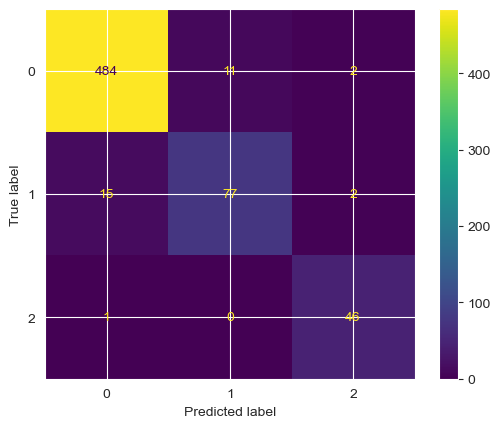

In [71]:
from sklearn.metrics import ConfusionMatrixDisplay
data_size = len('/kaggle/input/fetal-heath-classification/fetal_health.csv')  
print("For the amounts of training data is: ",data_size)
print("Accuracy of RandomForestClassifier: ",RF_model.score(X_test,y_test))
cm = confusion_matrix(y_test, predictions)
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.show()

In [72]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier()
DT_model.fit(X_train_smote,y_train_smote)
predictions = DT_model.predict(X_test)
print(accuracy_score(y_test,predictions))

0.9247648902821317


For the amounts of training data is:  57
Accuracy of DecisionTreeClassifier:  0.9247648902821317


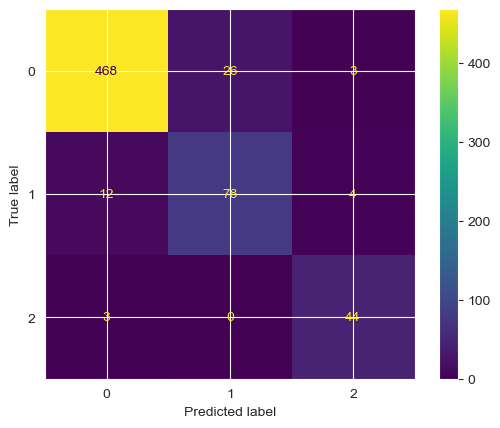

In [73]:
data_size = len('/kaggle/input/fetal-heath-classification/fetal_health.csv')  
print("For the amounts of training data is: ",data_size)
print("Accuracy of DecisionTreeClassifier: ",DT_model.score(X_test,y_test))
cm = confusion_matrix(y_test, predictions)
cm_display = ConfusionMatrixDisplay(cm).plot()
plt.show()

In [74]:
from sklearn.linear_model import LogisticRegression

LR_model = LogisticRegression(solver='lbfgs', max_iter=10000)
LR_model.fit(X_train_smote, y_train_smote) 
predictions = LR_model.predict(X_test)
print(accuracy_score (y_test, predictions))

0.841692789968652


For the amounts of training data is:  57
Accuracy of LogisticRegression:  0.841692789968652


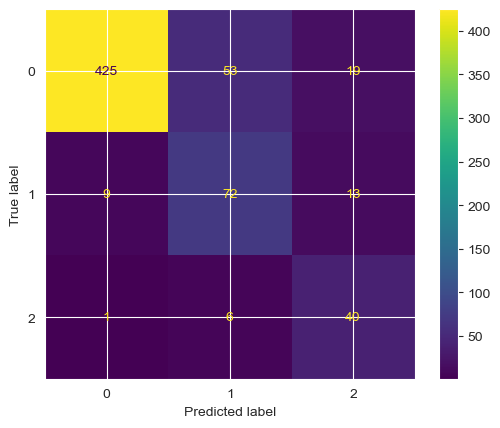

In [75]:
data_size = len('/kaggle/input/fetal-heath-classification/fetal_health.csv')  
print("For the amounts of training data is: ",data_size)
print("Accuracy of LogisticRegression: ", LR_model.score (X_test,y_test)) 

cm = confusion_matrix(y_test, predictions)

cm_display = ConfusionMatrixDisplay (cm).plot()

plt.show()

In [76]:
KNN_model = KNeighborsClassifier (n_neighbors=5) 
KNN_model.fit(X_train_smote, y_train_smote) 
predictions = KNN_model.predict(X_test) 
print (accuracy_score (y_test, predictions))

0.8855799373040752


For the amounts of training data is:  57
Accuracy of KNeighborsClassifier:  0.8855799373040752


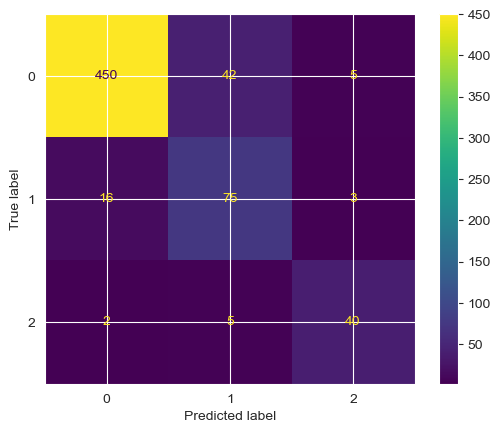

In [77]:
data_size = len('/kaggle/input/fetal-heath-classification/fetal_health.csv')  
print("For the amounts of training data is: ",data_size)

print("Accuracy of KNeighborsClassifier: ",KNN_model.score (X_test,y_test)) 
cm = confusion_matrix(y_test, predictions) 
cm_display= ConfusionMatrixDisplay (cm).plot() 
plt.show()

In [87]:
RF_model.predict([[0.345, 0.1225, 23346, 0.23456, 0.987, 2345, 123, 0,0,0,0,0,0,0,0,0,0,0,0,0,0]])

array([3.])

In [92]:
RF_model.predict([[0.000, 0.0, 73.3, 43.0, 2.4, 73.0, 43.0, 2.4, 73.0, 120.0, 121.0,45.7,0,0,0,0,0,0,0,0,0]])

array([3.])

In [106]:
names = ['Random Forest Classifier','Logistic Regression','K Neighbours Classifier']
scores = [0.95141065830721,0.841692789968652,0.8855799373040752]
import pandas as pd
df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df

,name,score
0,Random Forest Classifier,0.951411
1,Logistic Regression,0.841693
2,K Neighbours Classifier,0.885580


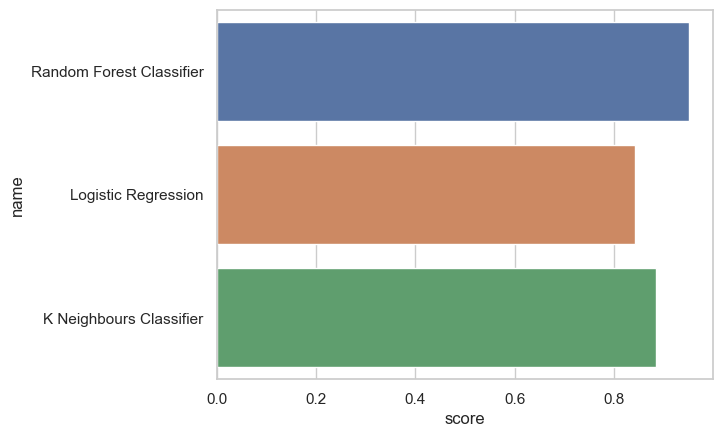

In [108]:
sns.set(style="whitegrid")
ax=sns.barplot(y="name", x="score", data=df)

In [109]:
import pickle
pickle.dump(RF_model,open('fetal_health1.pk1','wb'))
